In [1]:
import keras

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
dataset = pd.read_csv("devanagari-character-set/dataset.csv")

In [5]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dataset.iloc[:,1024].value_counts()

45      2000
11      2000
20      2000
19      2000
18      2000
17      2000
16      2000
15      2000
14      2000
13      2000
12      2000
10      2000
44      2000
9       2000
8       2000
7       2000
6       2000
5       2000
4       2000
3       2000
2       2000
1       2000
21      2000
22      2000
23      2000
24      2000
43      2000
42      2000
41      2000
40      2000
39      2000
38      2000
37      2000
36      2000
35      2000
34      2000
33      2000
32      2000
31      2000
30      2000
29      2000
28      2000
27      2000
26      2000
25      2000
0       2000
1024      45
Name: 1024, dtype: int64

In [7]:
rows_to_remove = np.where(dataset.iloc[:,1024].values==1024)
rows_to_remove

(array([ 2000,  4001,  6002,  8003, 10004, 12005, 14006, 16007, 18008,
        20009, 22010, 24011, 26012, 28013, 30014, 32015, 34016, 36017,
        38018, 40019, 42020, 44021, 46022, 48023, 50024, 52025, 54026,
        56027, 58028, 60029, 62030, 64031, 66032, 68033, 70034, 72035,
        74036, 76037, 78038, 80039, 82040, 84041, 86042, 88043, 90044], dtype=int64),)

In [8]:
X = dataset.iloc[:,:-1]
Y_d = dataset.iloc[:,-1]

In [9]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y_d.head()

0    0
1    0
2    0
3    0
4    0
Name: 1024, dtype: int64

In [11]:
num_pixels = X.shape[1]
num_classes = 46
img_width=32
img_height = 32
img_depth =1

In [12]:
X_images = X.values.reshape(X.shape[0],img_width,img_height)

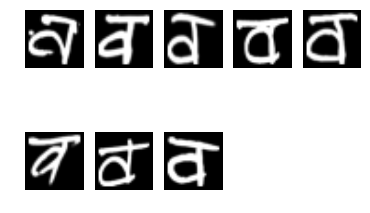

In [13]:
%matplotlib inline
for i in range(1,9):
    plt.subplot(250 + i)
    plt.axis('off')
    plt.imshow(X_images[i-1],cmap=plt.get_cmap('gray'))
plt.show()

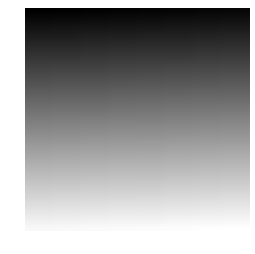

In [14]:
plt.imshow(X_images[4001],cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [15]:
dataset = dataset.drop(dataset.index[rows_to_remove[0]])

In [16]:
X = dataset.iloc[:,:-1]
X_images = X.values.reshape(X.shape[0],img_width,img_height)
Y_d = dataset.iloc[:,-1]

In [17]:
X = X/255 #normalization

In [18]:
def simple_nn_model():
    model = Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [20]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
seed=123
y = dataset.iloc[:,-1]
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)
estimator = KerasClassifier(build_fn=simple_nn_model, nb_epoch=10, batch_size=400, verbose=2)
X_train, X_test, Y_train, Y_test = train_test_split(X.values, dummy_y, test_size=0.20, random_state=seed)


In [21]:
estimator.fit(X_train,Y_train)

Epoch 1/10
21s - loss: 1.1630 - acc: 0.6951
Epoch 2/10
20s - loss: 0.5228 - acc: 0.8626
Epoch 3/10
20s - loss: 0.3239 - acc: 0.9160
Epoch 4/10
20s - loss: 0.2240 - acc: 0.9437
Epoch 5/10
20s - loss: 0.1644 - acc: 0.9597
Epoch 6/10
20s - loss: 0.1214 - acc: 0.9714
Epoch 7/10
20s - loss: 0.0894 - acc: 0.9805
Epoch 8/10
20s - loss: 0.0667 - acc: 0.9869
Epoch 9/10
19s - loss: 0.0500 - acc: 0.9916
Epoch 10/10
20s - loss: 0.0372 - acc: 0.9948


In [22]:
score = estimator.score(X_test,Y_test)
print(score)

0.943260865367


In [23]:
predictions = estimator.predict(X_test)
print(predictions)

[41 11 21 ..., 10  2 35]


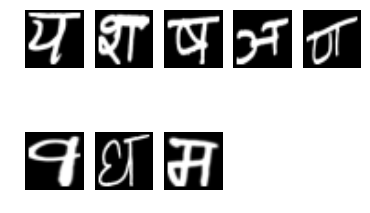

In [30]:
test_images = X_test.reshape(X_test.shape[0],img_width,img_height)
%matplotlib inline
for i in range(1,9):
    plt.subplot(250 + i)
    plt.axis('off')
    plt.imshow(test_images[i-1],cmap=plt.get_cmap('gray'))
plt.show()

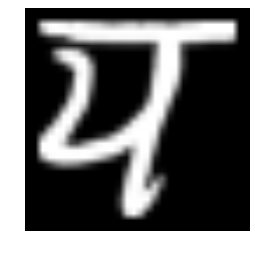

In [33]:
%matplotlib inline
plt.axis('off')
plt.imshow(test_images[0],cmap=plt.get_cmap('gray'))
plt.show()

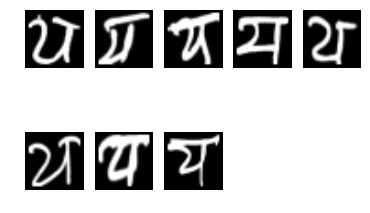

In [31]:
lower = predictions[0]*2000
upper = lower + 2000
df = dataset.iloc[lower:upper,:-1]
df_images = df.values.reshape(df.shape[0],img_width,img_height)
%matplotlib inline
for i in range(1,9):
    plt.subplot(250 + i)
    plt.axis('off')
    plt.imshow(df_images[i-1],cmap=plt.get_cmap('gray'))
plt.show()

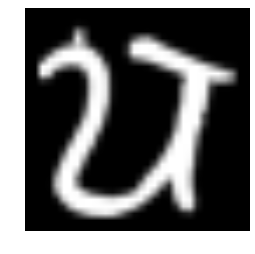

In [32]:
%matplotlib inline
plt.axis('off')
plt.imshow(df_images[0],cmap=plt.get_cmap('gray'))
plt.show()